In [1]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import PolynomialFeatures
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, r2_score
from sklearn import linear_model


In [4]:
import pandas as pd


file_paths = ["final/isosyote_df.csv", 
              "final/kuusamo_df.csv",
              "final/tahko_df.csv", 
              "final/lahti_df.csv", 
              "final/pyha_df.csv"]


dataframes = []
for file in file_paths:
    df = pd.read_csv(file)
    df["location"] = file.split("/")[-1].replace("_df.csv", "")  # Lisää paikkakunnan nimen
    dataframes.append(df)

# Yhdistetään kaikki DataFramet yhdeksi
df = pd.concat(dataframes, ignore_index=True)

# Tulostetaan ensimmäiset rivit
df.head()

,Observation station,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2],location
0,Taivalkoski parish,2004,1,1,2004-01-01,29.0,-30.5,NaN,0.2,isosyote
1,Taivalkoski parish,2004,1,2,2004-01-02,29.0,-13.7,NaN,-0.2,isosyote
2,Taivalkoski parish,2004,1,3,2004-01-03,29.0,-10.7,NaN,0.3,isosyote
3,Taivalkoski parish,2004,1,4,2004-01-04,29.0,-12.7,NaN,-0.4,isosyote
4,Taivalkoski parish,2004,1,5,2004-01-05,30.0,-14.6,NaN,-1.0,isosyote


In [11]:
df

,Year,Month,Day,Date,Snow depth mean [cm],Average temperature [°C],cloud_code,Global radiation mean [W/m2],location,day_of_year
0,2004,1,1,2004-01-01,29.0,-30.5,9.0,0.2,isosyote,1
1,2004,1,2,2004-01-02,29.0,-13.7,9.0,-0.2,isosyote,2
2,2004,1,3,2004-01-03,29.0,-10.7,9.0,0.3,isosyote,3
3,2004,1,4,2004-01-04,29.0,-12.7,9.0,-0.4,isosyote,4
4,2004,1,5,2004-01-05,30.0,-14.6,9.0,-1.0,isosyote,5
...,...,...,...,...,...,...,...,...,...,...
38241,2024,12,27,2024-12-27,18.0,-1.3,0.0,-1.4,pyha,362
38242,2024,12,28,2024-12-28,18.0,-2.6,8.0,-0.6,pyha,363
38243,2024,12,29,2024-12-29,18.0,-2.9,8.0,-0.7,pyha,364
38244,2024,12,30,2024-12-30,17.0,-6.2,8.0,-0.3,pyha,365


In [22]:
df.drop(columns=["location"], inplace=True)

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 38246 entries, 0 to 38245
Data columns (total 10 columns):
 #   Column                        Non-Null Count  Dtype         
---  ------                        --------------  -----         
 0   Year                          38246 non-null  int64         
 1   Month                         38246 non-null  int64         
 2   Day                           38246 non-null  int64         
 3   Date                          38246 non-null  datetime64[ns]
 4   Snow depth mean [cm]          38246 non-null  float64       
 5   Average temperature [°C]      38246 non-null  float64       
 6   cloud_code                    38246 non-null  float64       
 7   Global radiation mean [W/m2]  38246 non-null  float64       
 8   location                      38246 non-null  object        
 9   day_of_year                   38246 non-null  int32         
dtypes: datetime64[ns](1), float64(4), int32(1), int64(3), object(1)
memory usage: 2.8+ MB


In [6]:
df["Date"] = pd.to_datetime(df["Date"])
df['day_of_year'] = df['Date'].dt.dayofyear
df.drop(columns=["Observation station"], inplace=True)
#df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].str.replace(",", ".").astype(float)
#df["Snow depth mean [cm]"] = df["Snow depth mean [cm]"].str.replace(",", ".").astype(float)
#df["Average temperature [°C]"] = df["Average temperature [°C]"].str.replace(",", ".").astype(float)


In [8]:
df["Average temperature [°C]"] = df["Average temperature [°C]"].interpolate()
df["Global radiation mean [W/m2]"] = df["Global radiation mean [W/m2]"].interpolate()
df.loc[df['cloud_code'].isnull(),'cloud_code'] = 9
df.loc[df['Snow depth mean [cm]'].isnull(),'Snow depth mean [cm]'] = 0

In [9]:
X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
y = df["Snow depth mean [cm]"]

In [ ]:
#X = df[["Average temperature [°C]", "Global radiation mean [W/m2]", "day_of_year", "cloud_code"]]
#y = df["Snow depth mean [cm]"]

In [12]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [13]:
model = LinearRegression()
model.fit(X_train, y_train)

LinearRegression()

In [14]:
y_pred = model.predict(X_test)

In [15]:
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f"R2: {r2}")
print(f"Mean Squared Error: {mse}")

R2: 0.5501247723061673
Mean Squared Error: 299.46751543110383


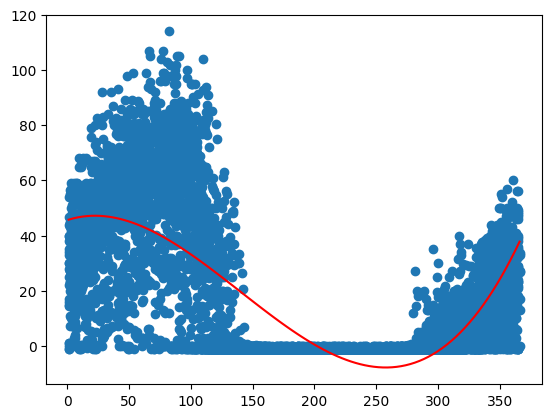

In [27]:
mymodel = np.poly1d(np.polyfit(X_train["day_of_year"], y_train, 3))

myline = np.linspace(1, 366, 100)


plt.scatter(X_test["day_of_year"], y_test)
plt.plot(myline, mymodel(myline), color='red')
plt.show()

In [28]:
snowdept = mymodel(2)
print(snowdept)

45.90845899636644


In [23]:
corr_matrix = df.corr()

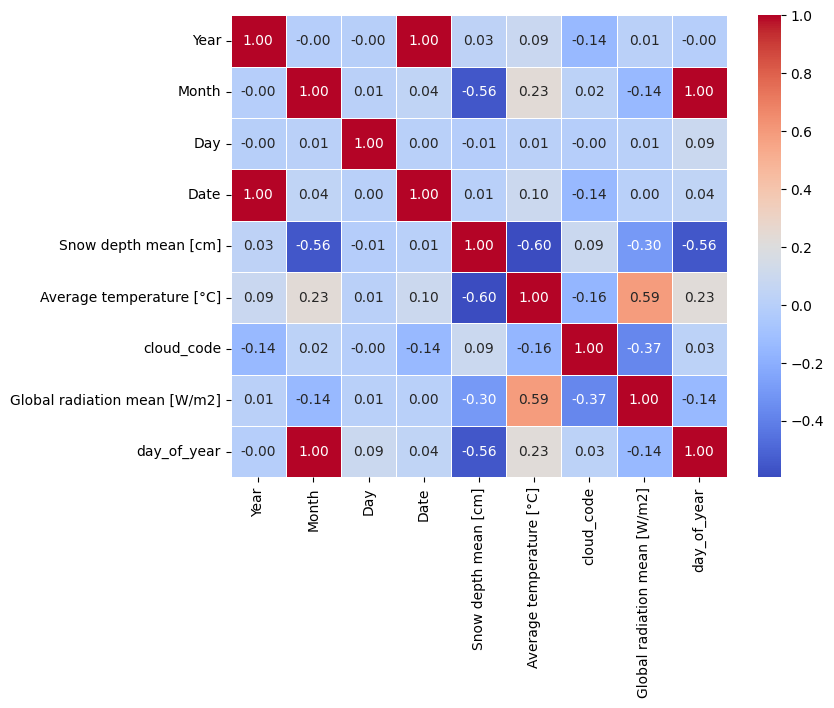

In [24]:
plt.figure(figsize=(8,6)) 
sns.heatmap(corr_matrix, annot=True, cmap="coolwarm", fmt=".2f", linewidths=0.5)


plt.show()